In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Importing the dataset**

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(df[['Gender', 'User ID']], axis=1, inplace=True)

**Splitting the dataset into the Training set and Test set**

In [5]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

**Fitting K-NN to the Training set**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

**Predicting the Test set results**

In [9]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [10]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[55,  3],
       [ 1, 21]])

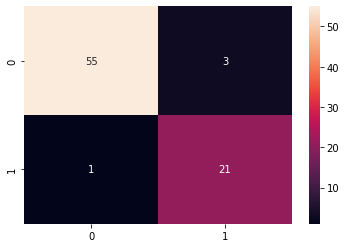

In [11]:
import seaborn as sns
sns.heatmap(con_matrix, annot=True)

In [12]:
from sklearn.metrics import accuracy_score, f1_score, r2_score 
print("Accuracy_score : ",accuracy_score(y_test, y_pred))
print("F1_score : ",f1_score(y_test, y_pred))
print('R2_score ',r2_score (y_test, y_pred))

Accuracy_score :  0.95
F1_score :  0.9130434782608695
R2_score  0.7492163009404389


In [14]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
print("accuracy_score : ",accuracy_score(y_test, y_pred))
print("f1_score : ",f1_score(y_test, y_pred))
y_score1 = knn.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Kneighbours_classifier: ', roc_auc_score(y_test, y_score1))

accuracy_score :  0.95
f1_score :  0.9130434782608695
roc_auc_score for Kneighbours_classifier:  0.9831504702194358


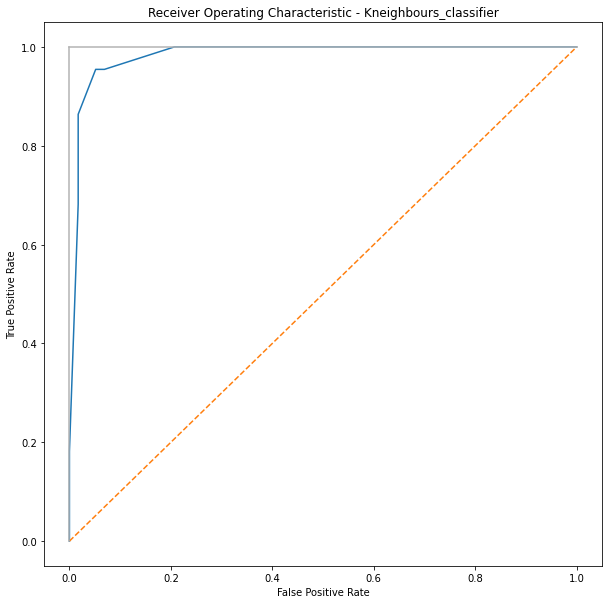

In [15]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Kneighbours_classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()